In [1]:
%matplotlib inline

In [ ]:
!conda install -y -c conda-forge zarr

In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
#base_folder ='/share/share/sub-sevir/'
base_folder = '/Users/seanfreeman/Documents/Teaching/Spring_2024/'

In [4]:
training_ds = xr.open_dataset(base_folder+"/sub-sevir/sub-sevir-train.zarr", engine='zarr')

In [5]:
training_ds

<xarray.Dataset>
Dimensions:         (n_samples: 60000, x: 48, y: 48, n_channel: 4)
Coordinates:
    id              (n_samples) object ...
  * n_channel       (n_channel) <U5 'ir069' 'ir107' 'vil' 'vis'
  * n_samples       (n_samples) datetime64[ns] 2018-08-25T00:15:00 ... 2019-0...
Dimensions without coordinates: x, y
Data variables:
    features        (n_samples, x, y, n_channel) float32 ...
    label_1d_class  (n_samples) int8 ...
    label_1d_reg    (n_samples) int16 ...
    label_2d_class  (n_samples, x, y) int8 ...
    label_2d_reg    (n_samples, x, y) int16 ...

In [27]:
one_sample = training_ds.isel(n_samples=0)

In [28]:
one_sample

<xarray.Dataset>
Dimensions:         (x: 48, y: 48, n_channel: 4)
Coordinates:
    id              object ...
  * n_channel       (n_channel) <U5 'ir069' 'ir107' 'vil' 'vis'
    n_samples       datetime64[ns] 2018-08-25T00:15:00
Dimensions without coordinates: x, y
Data variables:
    features        (x, y, n_channel) float32 ...
    label_1d_class  int8 ...
    label_1d_reg    int16 ...
    label_2d_class  (x, y) int8 ...
    label_2d_reg    (x, y) int16 ...

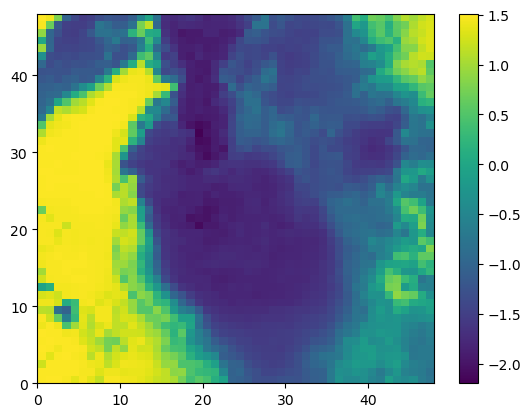

In [18]:
plt.pcolormesh(one_sample['features'][:, :, 1])
plt.colorbar()

In [111]:
two_sample = training_ds.isel(n_samples=[0,1], n_channel=[1])

In [112]:
two_sample.features.values.shape

(2, 48, 48, 1)

In [113]:
ds_two_sample = tf.data.Dataset.from_tensor_slices((two_sample.features.values,two_sample.label_1d_class.values))


In [114]:
for frame in ds_two_sample:
    break
frame

(<tf.Tensor: shape=(48, 48, 1), dtype=float32, numpy=
 array([[[ 1.4952592 ],
         [ 1.4964217 ],
         [ 1.4968094 ],
         ...,
         [-0.38381562],
         [-0.66437864],
         [-0.77559626]],
 
        [[ 1.4844087 ],
         [ 1.4878963 ],
         [ 1.4929342 ],
         ...,
         [-0.6419027 ],
         [-0.6798794 ],
         [-0.81357306]],
 
        [[ 1.2205089 ],
         [ 1.4917716 ],
         [ 1.4816961 ],
         ...,
         [-0.61632645],
         [-0.671354  ],
         [-0.7201812 ]],
 
        ...,
 
        [[ 0.89886904],
         [-0.98098093],
         [-1.2886702 ],
         ...,
         [ 1.1147165 ],
         [ 1.1960953 ],
         [ 1.3216511 ]],
 
        [[ 1.4743332 ],
         [ 0.66907084],
         [-1.1914032 ],
         ...,
         [ 1.0546513 ],
         [ 1.24221   ],
         [ 1.296075  ]],
 
        [[ 1.5026221 ],
         [ 1.4324813 ],
         [ 0.7981143 ],
         ...,
         [ 0.9814104 ],
         [ 1.151

In [115]:
tf.keras.backend.clear_session()
keras.utils.set_random_seed(1)
input1 = keras.layers.Input(shape=(48, 48, 1))
input_pool = keras.layers.MaxPool2D(pool_size=(2, 2),  padding='same')(input1)
model_pool = keras.models.Model(inputs=[input1], outputs=[input_pool])
model_pool.compile(optimizer=keras.optimizers.legacy.Adam(), loss='mean_squared_error')
model_pool.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 1)         0         
 D)                                                              
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model_pool.fit(ds_two_sample)

ValueError: in user code:

    File "/Users/seanfreeman/mambaforge/envs/aes690st-sp24-test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/seanfreeman/mambaforge/envs/aes690st-sp24-test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/seanfreeman/mambaforge/envs/aes690st-sp24-test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/seanfreeman/mambaforge/envs/aes690st-sp24-test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/seanfreeman/mambaforge/envs/aes690st-sp24-test/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/Users/seanfreeman/mambaforge/envs/aes690st-sp24-test/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 291, in __call__
        batch_dim = tf.shape(y_t)[0]

    ValueError: slice index 0 of dimension 0 out of bounds. for '{{node strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_INT32, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1](Shape, strided_slice/stack, strided_slice/stack_1, strided_slice/stack_2)' with input shapes: [0], [1], [1], [1] and with computed input tensors: input[1] = <0>, input[2] = <1>, input[3] = <1>.
